 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
pwd

'C:\\Users\\User\\4challenge\\Starter_Code'

In [27]:
# Reading whale returns
whale_returns = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [28]:
# Count nulls
whale_returns_df.isna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [29]:
# Drop nulls
whale_returns_df.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [30]:
# Reading algorithmic returns
algo_returns = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [31]:
# Count nulls
algo_returns_df.isna()

,Date,Algo 1,Algo 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1236,False,False,False
1237,False,False,False
1238,False,False,False
1239,False,False,False


In [32]:
# Drop nulls
algo_returns_df.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [33]:
# Reading S&P TSX 60 Closing Prices
sp_returns = Path("sp_tsx_history.csv")
sp_returns_df = pd.read_csv(sp_returns, infer_datetime_format=True, parse_dates=True)
sp_returns_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [34]:
# Reading S&P TSX 60 Closing Prices
sp_returns = Path("sp_tsx_history.csv")
sp_returns_df = pd.read_csv(sp_returns, infer_datetime_format=True, parse_dates=True)
sp_returns_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [35]:
# Check Data Types
sp_returns_df.dtypes

Date     object
Close    object
dtype: object

In [51]:
# Fix Data Types
sp_returns_df.columns = sp_returns_df.columns.str.strip()
sp_returns_df['Date'] = pd.to_datetime(sp_returns_df['Date'])
sp_returns_df['Close'] = sp_returns_df['Close'].astype(str).str.replace('$', '',regex=False)
sp_returns_df['Close'] = sp_returns_df['Close'].str.replace(',', '',regex=False)
sp_returns_df['Close'] = sp_returns_df['Close'].astype(float)
sp_returns_df["Close"].head()

0    12370.19
1    12391.23
2    12359.47
3    12447.68
4    12418.99
Name: Close, dtype: float64

In [52]:
# Calculate Daily Returns
sp_returns_df['Daily Returns'] = sp_returns_df['Close'].pct_change()
sp_returns_df.head()

,Date,Close,Daily Returns
0,2012-10-01,12370.19,NaN
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305


In [53]:
# Drop nulls
sp_returns_df.dropna()

,Date,Close,Daily Returns
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305
5,2012-10-09,12273.57,-0.011709
...,...,...,...
1813,2019-12-20,17118.44,0.003188
1814,2019-12-23,17128.71,0.000600
1815,2019-12-24,17180.15,0.003003
1816,2019-12-27,17168.21,-0.000695


In [58]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df = sp_returns_df.rename(columns={'Close': 'sp_returns_close'})
print(sp_returns_df.head())

        Date  sp_returns_close  Daily Returns
0 2012-10-01          12370.19            NaN
1 2012-10-02          12391.23       0.001701
2 2012-10-03          12359.47      -0.002563
3 2012-10-04          12447.68       0.007137
4 2012-10-05          12418.99      -0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [86]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#concatenating three dataframes basically
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_returns_df], axis=1, join="inner")
combined_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,sp_returns_close,Daily Returns
0,2015-03-02,NaN,NaN,NaN,NaN,2014-05-28,0.001745,NaN,2012-10-01,12370.19,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2014-05-29,0.003978,NaN,2012-10-02,12391.23,0.001701
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2014-05-30,0.004464,NaN,2012-10-03,12359.47,-0.002563
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,2014-06-02,0.005692,NaN,2012-10-04,12447.68,0.007137
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2014-06-03,0.005292,NaN,2012-10-05,12418.99,-0.002305


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: title={'center': 'Daily Returns'}>

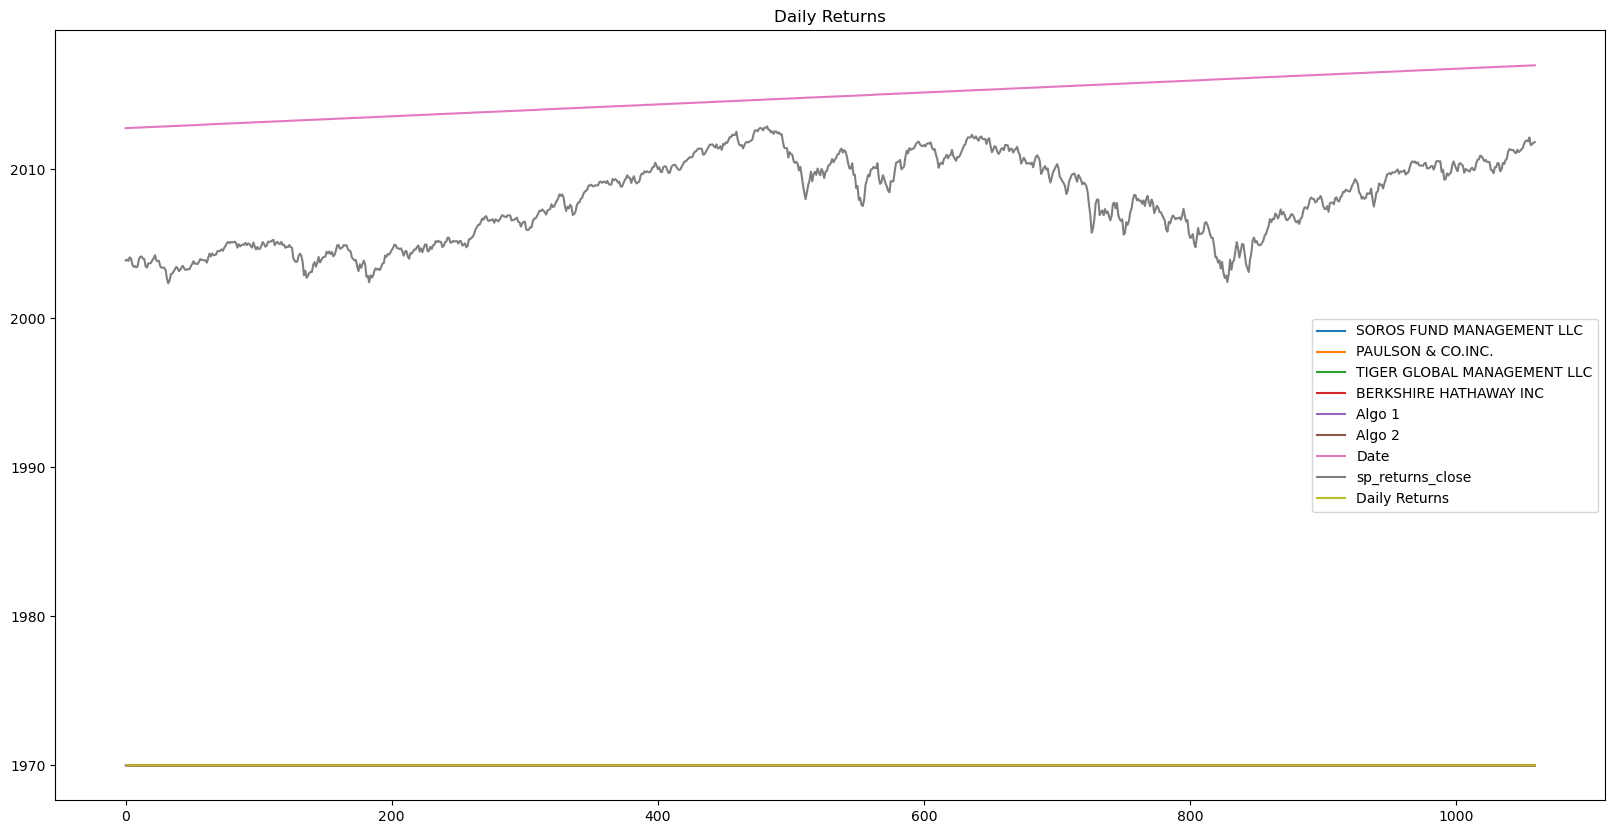

In [79]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10), title="Daily Returns")



In [80]:

print(combined_df)



            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC        Date  \
0                             NaN                     NaN  2014-05-28   
1                       -0.000496               -

#### Calculate and Plot cumulative returns.

In [108]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() -1
# Plot cumulative returns


TypeError: unsupported operand type(s) for +: 'int' and 'str'

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [88]:
# Box plot to visually show risk


# Set the title and labels


### Calculate Standard Deviations

In [90]:
# Calculate the daily standard deviations of all portfolios
combined_df_sd = combined_df.std(numeric_only=True)
combined_df_sd

SOROS FUND MANAGEMENT LLC         0.007842
PAULSON & CO.INC.                 0.006977
TIGER GLOBAL MANAGEMENT LLC       0.010824
BERKSHIRE HATHAWAY INC            0.012831
Algo 1                            0.007728
Algo 2                            0.008265
sp_returns_close               1026.993275
Daily Returns                     0.007417
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

<AxesSubplot: ylabel='Frequency'>

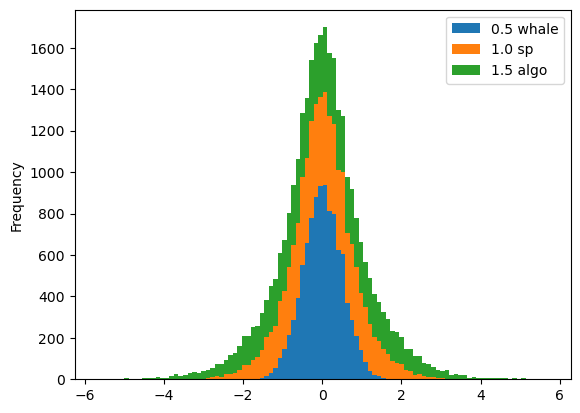

In [94]:
# Calculate  the daily standard deviation of S&P TSX 60
whale_returns_df_sd = whale_returns_df.std(numeric_only=True)
sp_returns_df_sd = sp_returns_df.std(numeric_only=True)
algo_returns_df_sd = algo_returns_df.std(numeric_only=True)

whale_returns_df_sd = np.random.normal(scale=0.5, size=10000)
sp_returns_df_sd = np.random.normal(scale=1.0, size=10000)
algo_returns_df_sd = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5 whale": whale_returns_df_sd,
    "1.0 sp": sp_returns_df_sd,
    "1.5 algo": algo_returns_df_sd
})

portfolio_std.plot.hist(stacked=True, bins=100)

# Determine which portfolios are riskier than the S&P TSX 60
#algo is riskier than s&p

### Calculate the Annualized Standard Deviation

In [95]:
# Calculate the annualized standard deviation (252 trading days)
annual_whale_returns_df_sd = whale_returns_df_sd * np.sqrt(252)
annual_whale_returns_df_sd

array([ 11.11103501,   4.5909988 ,  -7.67181505, ...,  -0.2282691 ,
       -21.67375185,   3.51233999])

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: title={'center': '21 Day Rolling STD DEV'}>

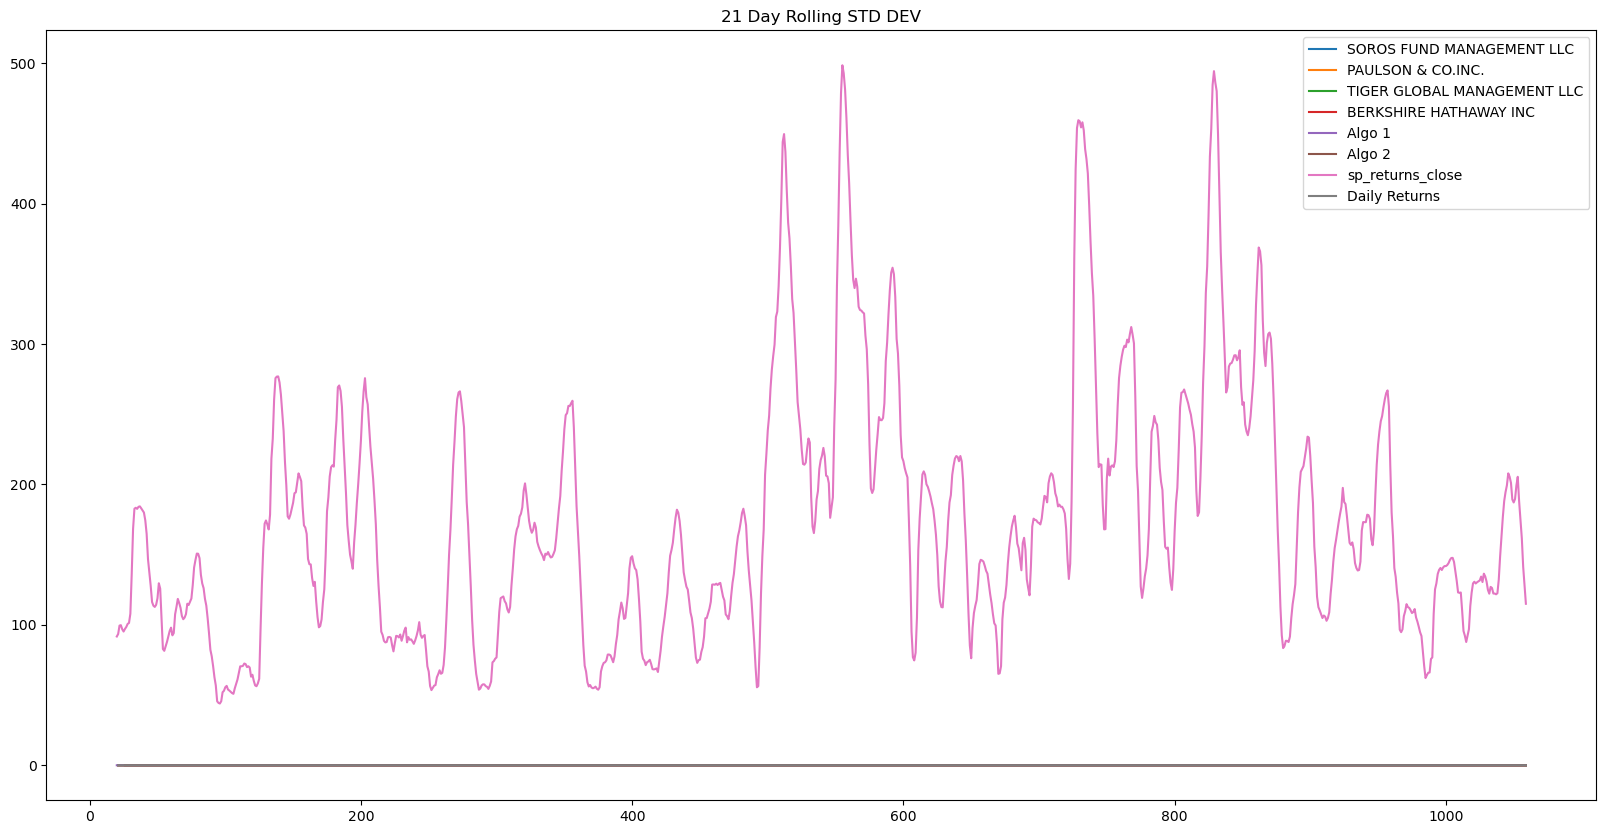

In [97]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.drop(columns=['Date']).rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling STD DEV")

# Plot the rolling standard deviation


### Calculate and plot the correlation

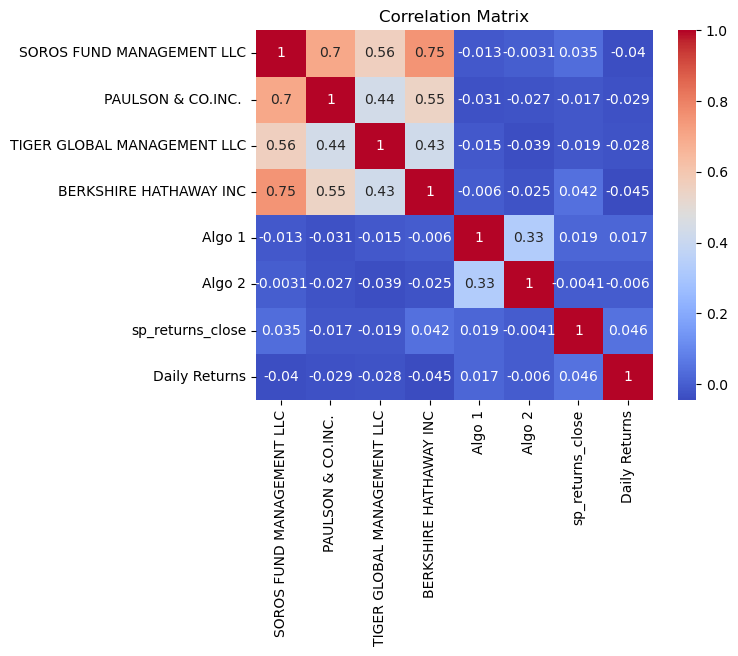

In [106]:
# Calculate the correlation
whale_correlation = combined_df.corr(numeric_only=True)
# whale_correlation.head()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(whale_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot: title={'center': 'Beta of Berkshire Hathaway Inc'}>

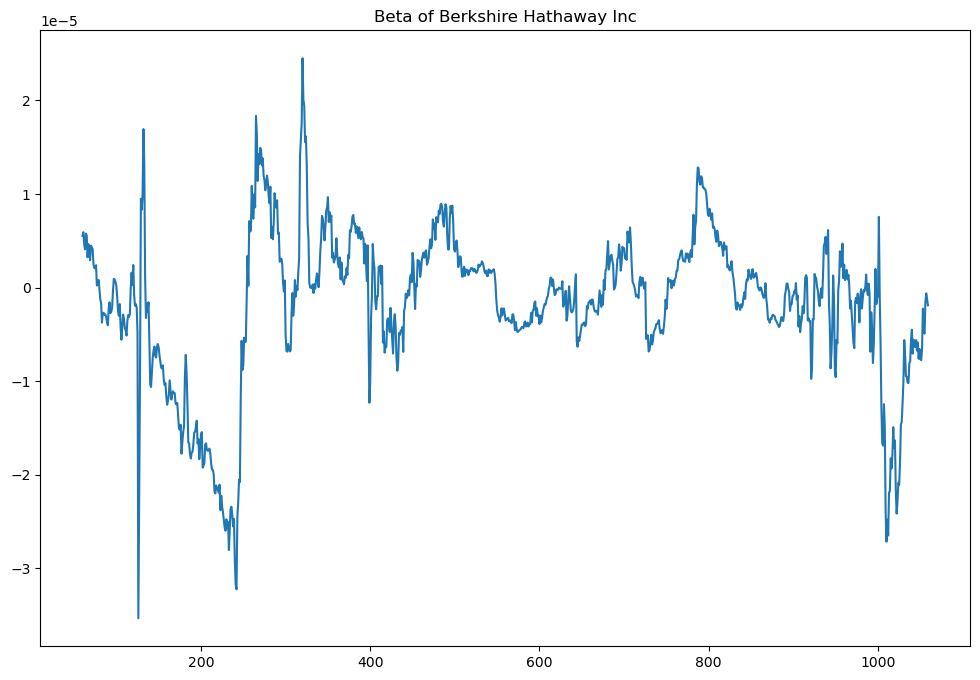

In [112]:
# Calculate covariance of a single portfolio
covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["sp_returns_close"])
covariance
# Calculate variance of S&P TSX
sp_var = combined_df["sp_returns_close"].rolling(60).var()
sp_var
# Computing beta
beta = (covariance / sp_var)
# Plot beta trend
beta.plot(figsize=(12,8), title="Beta of Berkshire Hathaway Inc")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [115]:
# Use `ewm` to calculate the rolling window
whale_ewm = combined_df.drop(columns=['Date']).ewm(halflife=21).mean()
whale_ewm.tail(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns_close,Daily Returns
1039,0.001021,0.000071,-0.001937,0.002528,0.000642,0.000491,14665.632335,0.000871
1040,0.001103,0.000111,-0.001706,0.002551,0.000517,0.000528,14679.747819,0.000973
1041,0.001108,0.000452,-0.001376,0.002208,0.000532,0.000314,14692.772841,0.000900
1042,0.001295,0.000648,-0.001027,0.002335,0.000442,0.000367,14705.189571,0.000858
1043,0.001269,0.000617,-0.000989,0.002286,0.000395,0.000414,14717.210944,0.000831
1044,0.001044,0.000454,-0.001169,0.002131,0.000420,0.000481,14726.891313,0.000674
1045,0.001329,0.000711,-0.001036,0.002233,0.000265,0.000432,14735.752498,0.000619
1046,0.001396,0.000560,-0.001023,0.002144,0.000208,0.000487,14747.022136,0.000778
1047,0.001535,0.000504,-0.000853,0.002312,0.000070,0.000313,14756.129728,0.000634
1048,0.001439,0.000450,-0.000813,0.001896,-0.000210,0.000414,14765.752993,0.000668


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [117]:
# Annualized Sharpe Ratios
combined_sharpe = ((combined_df.mean(numeric_only=True) * 252) / (combined_df.std(numeric_only=True) * np.sqrt(252)))
combined_sharpe

SOROS FUND MANAGEMENT LLC        0.361568
PAULSON & CO.INC.               -0.462131
TIGER GLOBAL MANAGEMENT LLC     -0.118257
BERKSHIRE HATHAWAY INC           0.619628
Algo 1                           1.104460
Algo 2                           0.804573
sp_returns_close               213.791647
Daily Returns                    0.484577
dtype: float64

In [119]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1]:
# Reading data from 1st stock


hi


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!